In [2]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(512, 512)


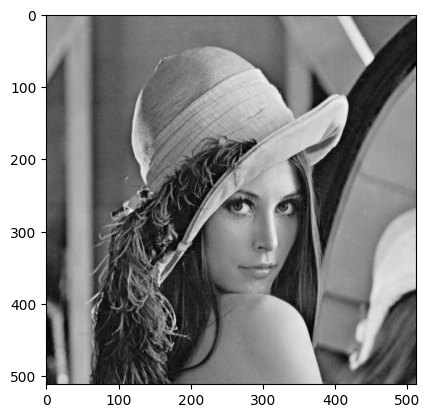

In [10]:
img = cv2.imread('/content/gdrive/MyDrive/디영처/lena2.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gImg= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg,cmap='gray')

In [11]:
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = int)
gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = int)

In [12]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [13]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

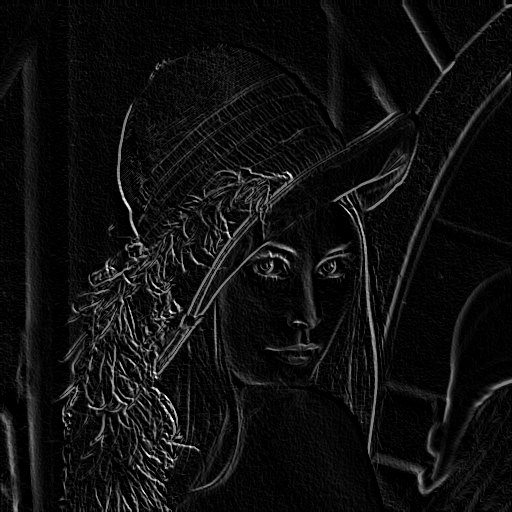

In [14]:
outimg = outImg * 5
cv2_imshow(outImg)

In [15]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

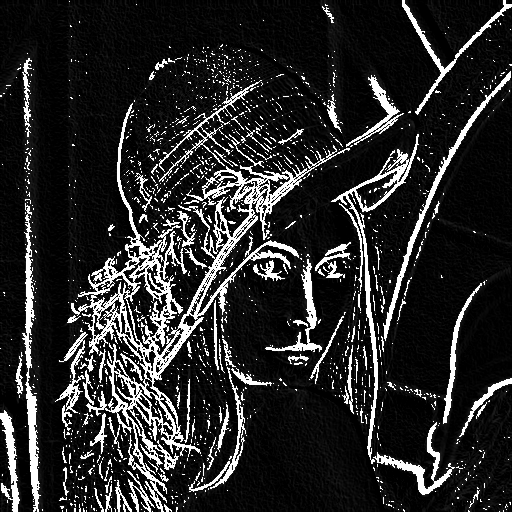

In [16]:
threshold = 30

for h in range(gImg.shape[0]) :
  for w in range(gImg.shape[1]):
    if(outImg[h,w] > threshold) :
      outImg[h,w] = 255

cv2_imshow(outImg)

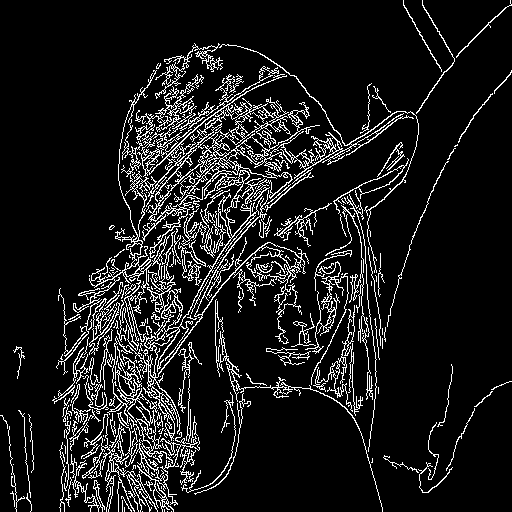

In [17]:
cannyImg = cv2.Canny(gImg, 20, 200)
cv2_imshow(cannyImg)

In [18]:
blurImg = cv2.GaussianBlur(gImg, (5,5), 1.4)

In [19]:
x = cv2.filter2D(blurImg, -1, gx)
y = cv2.filter2D(blurImg, -1, gy)

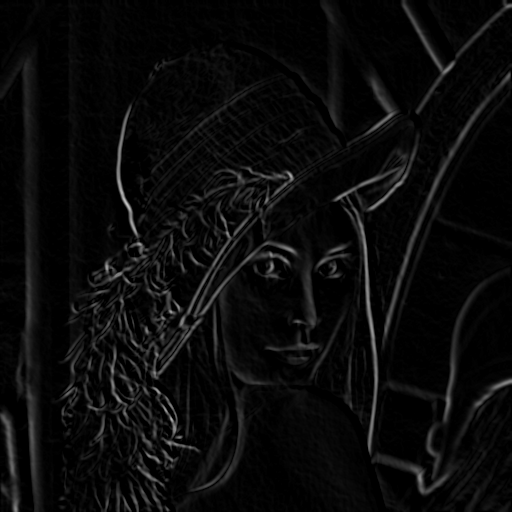

In [20]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(cannyOutImg)